# Comparing Collaborative Filtering Systems

According to studies done by the article "Comparing State-of-the-Art Collaborative Filtering Systems" by Laurent Candillier, Frank Meyer, and Marc Boulle, the __best user based approach__ is based on __pearson similarity and 1500 neighbors__. 

The __best item based approach__ is based on __probabilistic similarity and 400 neighbors__. 

The __best model based approach__ is using __K-means with euclidean distance, 4 clusters and prediction scheme based on the nearest cluster and Bayes model minimizing MAE__.  

Lastly, the __best default approach__ is based on __Bayes rule minimizing MAE__. 

We will try to implement the studies done by this article and see if we will achieve the same results. 

What we have implemented so far:
* Bayes
  * Bayes MAP
  * Bayes MSE
  * Bayes MAE
* Pearson Correlation (partially)

Table of Contents:
```
0. Last updated
1. Install and import libraries
2. Load dataset
3. Convert dataset to DataFrame (optional) 
4. Determine characteristics of data (optional)
5. Splitting the data (optional)
6. Calculate similarities and find nearest neighbors
7. Develop Model
8. Evaluate Metrics
9. Compare different CF systems
```

Explanation of Bayes:
* https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego
* http://www.analyticsvidhya.com/blog/2015/09/naive-bayes-explained/

## 0. Last updated

In [1]:
import datetime, time

# timestamp is not correct; it is 8 hours ahead
print (datetime.datetime.now() - datetime.timedelta(hours=8)).strftime('%Y-%m-%d %H:%M:%S')

2016-02-22 09:34:57


## 1. Install and import libraries

In [2]:
import importlib
import pip

def _install(package):
    pip.main(['install', package])

def _import(package):
    importlib.import_module(package)
    
def install_and_import(package):
    try:
        _import(package)
    except ImportError:
        _install(package)
        
# install PyMC
install_and_import("git+git://github.com/pymc-devs/pymc.git")

  Cloning git://github.com/pymc-devs/pymc.git to /tmp/pip-cguRXH-build


You are using pip version 7.1.2, however version 8.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# zip up source_dir located in GitHub remote_url's remote_branch and add it to Spark's source context
remote_url = "https://github.com/lab41/hermes.git"
remote_branch = "master"
source_dir = "src"
debug = True

# helper functions
import os
import functools

def _list_all_in_dir(dir_path):
    for path, subdirs, files in os.walk(dir_path):
        for filename in files:
            print os.path.join(path, filename)
            
def _zip_dir(srcdir_path, zipfile_handler):
    try:
        zipfile_handler.writepy(srcdir_path)
    finally:
        zipfile_handler.close()
            
def trackcalls(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        wrapper.has_been_called = True
        return func(*args, **kwargs)
    wrapper.has_been_called = False
    return wrapper

@trackcalls
def _add_zipfile_to_sc(zipfile_path):
    sc.addPyFile(zipfile_path) 
    
import git
import os
import tempfile
import shutil
import zipfile    

# create a temporary directory
tmpdir_path = tempfile.mkdtemp()
if debug: print "temporary directory: %s\n" % tmpdir_path

# ensure file is read/write by creator only
saved_umask = os.umask(0077)

# create a zipfile handler to zip the necessary files
ziptmpdir_path = tempfile.mkdtemp()
if debug: print "temporary directory for zip file: %s\n" % ziptmpdir_path
zipfile_path = ziptmpdir_path + "/hermes_src_2.zip"
if debug: print "zip file's path: %s\n" % zipfile_path
zipfile_handler = zipfile.PyZipFile(zipfile_path, "w")

# make zipfile handler verbose for debugging
zipfile_handler.debug = 3

try:
    # clone "framework" branch from GitHub into temporary directory
    local_branch = git.Repo.clone_from(remote_url, tmpdir_path, branch=remote_branch)
    if debug: print "current branch: %s\n" % local_branch.head.ref
    if debug: print "list all in %s:" % tmpdir_path; _list_all_in_dir(tmpdir_path); print "\n"
        
    # zip "hermes" directory
    if debug: print "zipping: %s\n" % os.path.join(tmpdir_path, source_dir)
    _zip_dir(os.path.join(tmpdir_path, source_dir), zipfile_handler)
    
    # check zip file
    if debug: print "Is zip file %s valid? %s\n" % (zipfile_path, zipfile.is_zipfile(zipfile_path))
    
    # add zip to SparkContext 
    # note: you can only add zip to SparkContext one time
    if not _add_zipfile_to_sc.has_been_called:
        if debug: print "add zip file %s into spark context\n" % zipfile_path
        _add_zipfile_to_sc(zipfile_path)
    else:
        if debug: print "zip file %s is already added into spark context; will not re-add\n" % zipfile_path
    
except IOError as e:
    raise e
else:
    os.remove(zipfile_path)
finally:
    os.umask(saved_umask)
    shutil.rmtree(tmpdir_path)
    shutil.rmtree(ziptmpdir_path)


temporary directory: /tmp/tmpwlWr9J

temporary directory for zip file: /tmp/tmpCu0tZV

zip file's path: /tmp/tmpCu0tZV/hermes_src_2.zip

current branch: master

list all in /tmp/tmpwlWr9J:
/tmp/tmpwlWr9J/.gitignore
/tmp/tmpwlWr9J/README.md
/tmp/tmpwlWr9J/LICENSE
/tmp/tmpwlWr9J/.git/config
/tmp/tmpwlWr9J/.git/packed-refs
/tmp/tmpwlWr9J/.git/index
/tmp/tmpwlWr9J/.git/description
/tmp/tmpwlWr9J/.git/HEAD
/tmp/tmpwlWr9J/.git/hooks/applypatch-msg.sample
/tmp/tmpwlWr9J/.git/hooks/pre-rebase.sample
/tmp/tmpwlWr9J/.git/hooks/update.sample
/tmp/tmpwlWr9J/.git/hooks/post-commit.sample
/tmp/tmpwlWr9J/.git/hooks/commit-msg.sample
/tmp/tmpwlWr9J/.git/hooks/prepare-commit-msg.sample
/tmp/tmpwlWr9J/.git/hooks/post-update.sample
/tmp/tmpwlWr9J/.git/hooks/pre-applypatch.sample
/tmp/tmpwlWr9J/.git/hooks/post-receive.sample
/tmp/tmpwlWr9J/.git/hooks/pre-commit.sample
/tmp/tmpwlWr9J/.git/refs/remotes/origin/HEAD
/tmp/tmpwlWr9J/.git/refs/heads/master
/tmp/tmpwlWr9J/.git/logs/HEAD
/tmp/tmpwlWr9J/.git/logs/r

In [4]:
# import the required modules from Hermes
from src.algorithms import performance_metrics as pm
from src.data_prep import movieLens_vectorize as mv
from src.utils import save_load as sl

# import other modules
import os
import time

RDFLib Version: 4.2.1


In [5]:
class Timer(object):
    """ 
    To time how long a particular function runs.

    Example:
        import Timer
        with Timer() as t:
            somefunction()
        print("somefunction() takes %s seconds" % t.secs)
        print("somefunction() takes %s milliseconds" % t.msecs)
    """

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.secs = self.end - self.start
        self.msecs = self.secs * 1000

## 2. Load dataset, in this case MovieLens data

We are going to use MovieLens's 1M data.

In [ ]:
# ratings_json_path
# movies_json_path

## 3. Convert dataset to Dataframe
Run this only when you load datasets from your home directory.

In [11]:
def convert_dataset_to_dataframe(dataset_path):
    df = sqlCtx.read.json(dataset_path, None)
    df = df.repartition(sc.defaultParallelism * 3)
    return df

# obtaining ratings dataframe
ratingsdf = convert_dataset_to_dataframe(ratings_json_path)

# obtaining movies dataframe
moviesdf = convert_dataset_to_dataframe(movies_json_path)

## 4. Determine characteristics of the MovieLens data (optional)
Run this only when you load datasets from your home directory.

Format: 
* ratings = [user_id, movie_id, rating, timestamp]
* movies = [movie_id, title, genres]

In [7]:
# extract most commonly used vectors to be used later on

# 1. using ratingsdf

# a. [(user_id, movie_id, rating)]
umr  = ratingsdf.map(lambda row: (row.user_id, row.movie_id, row.rating))
# b. [(user_id, movie_id, rating)] where rating >= 3
umr_weighted = umr.filter(lambda (user_id, movie_id, rating): rating >= 3)

print "-" * 80

print "format: [(user_id, movie_id, rating)]\n"
print "umr:\n", umr.take(2)
print "umr_weighted:\n", umr_weighted.take(2)

print "-" * 80

print "\nTo identify user-to-user similarity:"
print "format: [(movie_id, (user_id, rating))]\n"
# c. [(movie_id, (user_id, rating)] -> to identify user-to-user similarity
m_ur = ratingsdf.map(lambda row: (row.movie_id, (row.user_id, row.rating)))
# d. [(movie_id, (user_id, rating)] where rating >= 3
m_ur_weighted = m_ur.filter(lambda (movie_id, (user_id, rating)): rating >= 3)
print "m_ur:\n", m_ur.take(2)
print "m_ur_weighted (aka rating >=3):\n", m_ur_weighted.take(2)

print "-" * 80

print "\nTo identify movie-to-movie similarity:"
print "format: [(user_id, (movie_id, rating))]\n"
# e. [(user_id, (movie_id, rating))] -> to identify movie-to-movie similarity
u_mr = ratingsdf.map(lambda row: (row.user_id, (row.movie_id, row.rating)))
# f. [(user_id, (movie_id, rating))] where rating >= 3
u_mr_weighted = u_mr.filter(lambda (user_id, (movie_id, rating)): rating >= 3)
print "um_r:\n", u_mr.take(2)
print "um_r_weighted (aka rating >=3):\n", u_mr_weighted.take(2)

print "-" * 80


--------------------------------------------------------------------------------
format: [(user_id, movie_id, rating)]

umr:
[(2, 1955, 4.0), (5, 2291, 5.0)]
umr_weighted:
[(2, 1955, 4.0), (5, 2291, 5.0)]
--------------------------------------------------------------------------------

To identify user-to-user similarity:
format: [(movie_id, (user_id, rating))]

m_ur:
[(1955, (2, 4.0)), (2291, (5, 5.0))]
m_ur_weighted (aka rating >=3):
[(1955, (2, 4.0)), (2291, (5, 5.0))]
--------------------------------------------------------------------------------

To identify movie-to-movie similarity:
format: [(user_id, (movie_id, rating))]

um_r:
[(2, (1955, 4.0)), (5, (2291, 5.0))]
um_r_weighted (aka rating >=3):
[(2, (1955, 4.0)), (5, (2291, 5.0))]
--------------------------------------------------------------------------------


In [7]:
# total number of distinct users
num_distinct_users = ratingsdf.map(lambda row: row.user_id).distinct().count()
num_users = ratingsdf.map(lambda row: row.user_id).count()
print "total number of distinct users = ", num_distinct_users
print "total number of users = ", num_users

total number of distinct users =  6040
total number of users =  1000209


In [8]:
# total number of ratings
# should be the same as num_users
num_ratings = ratingsdf.map(lambda row: row.rating).count()
print "total number of ratings = ", num_ratings

total number of ratings =  1000209


In [9]:
# total number of distinct movies
num_distinct_movies = moviesdf.map(lambda row: row.movie_id).distinct().count()
num_movies = moviesdf.map(lambda row: row.movie_id).count()
print "total number of distinct movies = ", num_distinct_movies
print "total number of movies = ", num_movies

total number of distinct movies =  3883
total number of movies =  3883


In [10]:
# what is the average number of ratings a user rates = number of ratings / number of users
# round it to the fourth digit
avg_num_ratings_per_user = round(float(num_ratings) / float(num_distinct_users), 4)
print "average number of ratings a user rates = ", avg_num_ratings_per_user

average number of ratings a user rates =  165.5975


In [11]:
# what is the average number of ratings a movie receives = number of ratings / number of movies
avg_num_ratings_per_movie = round(float(num_ratings) / float(num_distinct_movies), 4)
print "average number of ratings a movie receives = ", avg_num_ratings_per_movie

average number of ratings a movie receives =  257.5867


In [12]:
# completeness = number of ratings / (number of users * number of movies)
completeness = round(float(num_ratings) / (float(num_distinct_users) * float(num_distinct_movies)), 4)
print "completeness = ", completeness

completeness =  0.0426


In [13]:
# mean rating
mean_rating = ratingsdf.map(lambda row: row.rating).mean()
print "mean rating = ", mean_rating

mean rating =  3.58156445303


In [14]:
# mean rating per movie

# [(movie_id, rating)]
movie_rating_pair = ratingsdf.map(lambda row: (row.movie_id, row.rating))

"""
combineByKey() requires 3 functions: 
* createCombiner: first aggregation step for each key
  -> lambda first_rating: (first_rating, 1)
* mergeValue: what to do when a combiner is given a new value
  -> lambda x, first_rating: x[0] + first_rating, x[1] + 1
  -> lambda thisNewRating_thisNumRating, firstRating: thisNewRating + firstRating, thisNumRating + 1
* mergeCombiner: how to merge two combiners
  -> lambda x, y: (x[0] + y[0], x[1] + y[1])
  -> lambda sumRating1_numRating1, sumRating2_numRating2: (sumRating1 + sumRating2, numRating1 + numRating2)
"""

# [(movie_id, (sum_rating, num_rating))]
movie_sumRating_numRating_pair = movie_rating_pair.combineByKey(
                                    lambda first_rating: (first_rating, 1), 
                                    lambda x, first_rating: (x[0] + first_rating, x[1] + 1),
                                    lambda x, y: (x[0] + y[0], x[1] + y[1]))

# [(movie_id, mean_rating)]
movie_meanRating_pair = movie_sumRating_numRating_pair.map(lambda (movie_id, (sum_rating, num_rating)): (movie_id, sum_rating/num_rating)) 
movie_meanRating_pair.take(3)

[(3072, 3.7871690427698574),
 (2304, 3.5714285714285716),
 (3120, 3.0153846153846153)]

In [15]:
# meanRating_numRating_pair will be used in plotting in the next cell
# where _1 = mean rating of the movie
#       _2 = number of users who review the movie
# [(mean_rating, num_rating)]
meanRating_numRating_pair = movie_sumRating_numRating_pair.map(lambda (movie_id, (sum_rating, num_rating)): (sum_rating/num_rating, num_rating))
meanRating_numRating_pair_df = meanRating_numRating_pair.toDF()
meanRating_numRating_pair_df.show()

+------------------+----+
|                _1|  _2|
+------------------+----+
|3.7871690427698574| 982|
|3.5714285714285716|   7|
|3.0153846153846153| 130|
| 3.697142857142857| 525|
|2.1604938271604937|  81|
|4.0739348370927315| 798|
|3.1486486486486487| 222|
|               3.0|   1|
|3.1794871794871793| 624|
|2.6666666666666665|   3|
| 3.272727272727273|  33|
|               4.5|   2|
|              3.54|  50|
|3.8797920727745288|1539|
|3.2400756143667295| 529|
| 3.201058201058201| 945|
|  3.91864406779661| 590|
|2.9764397905759163| 382|
| 2.107476635514019| 214|
|2.6826923076923075| 624|
+------------------+----+



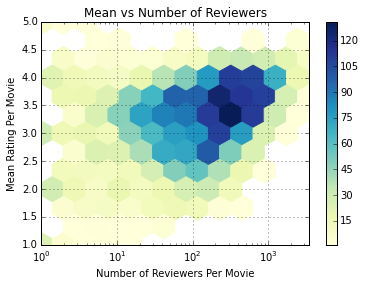

In [19]:
# plot mean rating per movie
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

meanRating_numRating_pair = movie_sumRating_numRating_pair.map(lambda (movie_id, (sum_rating, num_rating)): (sum_rating/num_rating, num_rating))
meanRating_numRating_pair_df = meanRating_numRating_pair.toDF()

meanRating_numRating_pair_panda_df = meanRating_numRating_pair_df.toPandas()

plot =  meanRating_numRating_pair_panda_df.plot(
            x="_2", \
            y="_1", \
            kind="hexbin", \
            xscale="log", \
            cmap="YlGnBu", \
            gridsize=12, \
            mincnt=1, \
            title="Mean vs Number of Reviewers")

plot.set_xlabel("Number of Reviewers Per Movie")
plot.set_ylabel("Mean Rating Per Movie")

plt.show()

This figure shows that the average rating of a movie is actually slightly higher than 3. 

__Hypothesis__:
* We can safely predict the mean rating after 100 reviews.
* After 100 reviews, the average rating is approximately in between 3.0 and 4.0.

## 5. Splitting the data  (optional)
Run this only when you load datasets from your home directory.

Default split data into:
* 90% training
* 10% test
* 0% validation
* seed = 41

Remember that calling randomSplit when you restart the kernel will provide you with a different training, test, and validation data even though the weights and the seed are the same.

In [13]:
weights = [0.9, 0.1, 0]
seed = 41

In [14]:
# 1. using ratingsdf
# a. [(user_id, movie_id, rating)]
umr_train, umr_test, umr_validation = umr.randomSplit(weights, seed)
# b. [(user_id, movie_id, rating)] where rating >= 3
umr_weighted_train, umr_weighted_test, umr_weighted_validation = umr_weighted.randomSplit(weights, seed)
# c. [(movie_id, (user_id, rating)]
m_ur_train, m_ur_test, m_ur_validation = m_ur.randomSplit(weights, seed)
# d. [(movie_id, (user_id, rating)] where rating >= 3
m_ur_weighted_train, m_ur_weighted_test, m_ur_weighted_validation = m_ur_weighted.randomSplit(weights, seed)
# e. [(user_id, (movie_id, rating)]
u_mr_train, u_mr_test, u_mr_validation = u_mr.randomSplit(weights, seed)
# f. [(user_id, (movie_id, rating)] where rating >= 3
u_mr_weighted_train, u_mr_weighted_test, u_mr_weighted_validation = u_mr_weighted.randomSplit(weights, seed)

NameError: name 'umr' is not defined

## 6. Calculate similarity and find nearest neighbors

These are the different similarity measurement implemented in the article:
* pearson
* cosine
* constraint pearson: in the case of MovieLens data, it means any ratings greater than 3 (aka positive ratings)
* adjusted cosine
* probabilistic

"When implementing a user- or item-based approach, one may choose:
* a similarity measure: pearson, cosine, constraint pearson, adjusted cosine, or probabilistic
* a neighborhood size
* and how to compute predictions: using a weighted sum of rating values or using a weighted sum of deviations from the mean."

Table of Contents:
```
6.A.1.  Calculate Pearson Correlation    
        a. user-based: DONE except for prediction
        b. item-based
6.A.2.  Calculate Weighted Pearson Correlation 
        a. user-based
        b. item-based
6.A.3.  Calculate Pearson Deviation
        a. user-based
        b. item-based
6.B.1.  Calculate Probabilistic Similarity 
        a. user-based
        b. item-based
6.B.2.  Calculate Probabilistic Deviation
        a. user-based
        b. item-based
6.C.1.  Calculate Cosine Similarity
        a. user-based
        b. item-based
6.C.2.  Calculate Adjusted Cosine Similarity   
        a. user-based
        b. item-based
6.D.    Comparing Similarities' Measurement
```

## 6.A.1. Calculate Pearson Correlation 

In [31]:
# helper functions

from scipy.stats import pearsonr 
import math

# filter out duplicate pairs
# user-based approach: 
#     input and output: [( movie_id, ((user_id_1, rating_1), (user_id_2, rating_2)) )]
# item-based approach: 
#     input and output: [( user_id, ((movie_id_1, rating_1), (movie_id_2, rating_2)) )]
def removeDuplicates((key_id, ratings)):
    (value_id_1, rating_1) = ratings[0]
    (value_id_2, rating_2) = ratings[1]
    return value_id_1 < value_id_2

# rearrange so that it will be in the format of pairs
# user-based approach: 
#     input: [( movie_id, ((user_id_1, rating_1), (user_id_2, rating_2)) )]
#     output: [( movie_id, ((user_id_1, user_id_2), (rating_1, rating_2)) )]
# item-based approach: 
#     input: [( user_id, ((movie_id_1, movie_id_2), (rating_1, rating2)) )]
#     output: [( user_id, ((movie_id_1, movie_id_2), (rating_1, rating2)) )]
def createPairs((key_id, ratings)):
    (value_id_1, rating_1) = ratings[0]
    (value_id_2, rating_2) = ratings[1]
    return ((value_id_1, value_id_2), (rating_1, rating_2))

# aggregate pairs using combineByKey() instead of groupByKey()
# [( test_user_id, train_user_id), (test_rating_1, train_rating_1), (test_rating_2, train_rating_2), ...]
def aggregatePairs(keyPairs):
    return keyPairs.combineByKey(
                    lambda firstRatingPair: ((firstRatingPair),),
                    lambda newRatingPair, firstRatingPair: newRatingPair + ((firstRatingPair),),
                    lambda tupleRatingPairs1, tupleRatingPairs2: tupleRatingPairs1 + tupleRatingPairs2)

# calculate pearson correlation when you passed in the values of
# user-based approach: 
#     input: values of  [(user_id_1, user_id_2), ((rating_1, rating_2), (rating_1, rating_2)...)]
#     output: values of [(user_id_1, user_id_2), (pearson_correlation, num_rating_pairs, p_value)]
# item-based approach:
#     input: values of [(movie_id_1, movie_id_2), ((rating_1, rating_2), (rating_1, rating_2)...)]
#     output: values of [(movie_id_1, movie_id_2), (pearson_correlation, num_rating_pairs, p_value)]
# NOTE: ignore p_value
def calculatePearson(ratingPairs):
    rating1s = [rating1 for (rating1, _) in ratingPairs] 
    rating2s = [rating2 for (_, rating2) in ratingPairs] 
    pearson_correlation, p_value = pearsonr(rating1s, rating2s)
    return (pearson_correlation, len(ratingPairs))


### 6.A.1. Pearson's User-Based Approach: comparing USER similarities
According to the article, this is supposed to be the best user-based approach. 

In [81]:
#((user_id, movie_id), rating)
a = sc.parallelize([ ((1, 2), 3), ((2, 2), 4) ])
#((user_id, movie_id), predicted_rating)
b = sc.parallelize([ ((1, 2), 2), ((2, 2), 5) ])
#((user_id, movie_id), (rating, predicted_rating)
c = a.join(b)
c.collect()

[((1, 2), (3, 2)), ((2, 2), (4, 5))]

In [9]:
# combine test and train together so that
# [movie_id, ( (test_user_id, test_rating), (train_user_id, train_rating) )]
M_testUR_trainUR = m_ur_test.join(m_ur_train)
print M_testUR_trainUR.count()
M_testUR_trainUR.take(5)

73388300


[(1920, ((731, 4.0), (746, 1.0))),
 (1920, ((731, 4.0), (791, 4.0))),
 (1920, ((731, 4.0), (1101, 3.0))),
 (1920, ((731, 4.0), (1333, 1.0))),
 (1920, ((731, 4.0), (1737, 5.0)))]

In [10]:
# remove duplicates
M_testUR_trainUR = M_testUR_trainUR.filter(removeDuplicates) 
print M_testUR_trainUR.count()
M_testUR_trainUR.take(2)

36722428


[(1920, ((731, 4.0), (746, 1.0))), (1920, ((731, 4.0), (791, 4.0)))]

In [11]:
# rearrange so that it will be in the format
# [(test_user_id, train_user_id), (test_rating, train_rating)]
userPairs = M_testUR_trainUR.map(createPairs)
print userPairs.count()
userPairs.take(2)

36722428


[((1264, 1519), (2.0, 2.0)), ((1264, 2020), (2.0, 3.0))]

In [12]:
# congregate all ratings for each user pair so that it will be in the format of:
# [( test_user_id, train_user_id), (test_rating_1, train_rating_1), (test_rating_2, train_rating_2), ...]

# instead of using groupByKey(), use combineByKey() instead.

"""
# Implemented using groupByKey():
with Timer() as t:
    aggUserPairs = userPairs.groupByKey()
print "aggregate user pairs approach #1: %s seconds" % t.secs
print aggUserPairs.count()
aggUserPairs.take(5)
-----------------------------------------------------------------
# Output:
aggregate user pairs: 0.0353801250458 seconds
10728120
Out[20]:
[((1274, 2736), <pyspark.resultiterable.ResultIterable at 0x7f180eb55350>),
 ((2117, 5393), <pyspark.resultiterable.ResultIterable at 0x7f180eb55510>),
 ((1422, 3892), <pyspark.resultiterable.ResultIterable at 0x7f180eb55550>),
 ((1902, 5636), <pyspark.resultiterable.ResultIterable at 0x7f180eb55590>),
 ((3679, 5555), <pyspark.resultiterable.ResultIterable at 0x7f180eb555d0>)]
-----------------------------------------------------------------
output = aggUserPairs.mapValues(lambda iterable: tuple(iterable))
output.take(2)
-----------------------------------------------------------------
# Output:
[((3848, 4390), ((5.0, 5.0),)),
 ((897, 2621), ((4.0, 5.0), (4.0, 4.0), (2.0, 2.0)))]
-----------------------------------------------------------------
"""

with Timer() as t:
    aggUserPairs = aggregatePairs(userPairs)
print "aggregate user pairs: %s seconds" % t.secs
print aggUserPairs.count()
aggUserPairs.take(2)

aggregate user pairs: 0.0375311374664 seconds
10728120


[((4978, 6024), ((5.0, 4.0), (4.0, 4.0))),
 ((1865, 3381), ((4.0, 4.0), (5.0, 4.0)))]

In [13]:
# calculate pearson correlation to figure out user-to-user similarity in the format of:
# [( (test_user_id, train_user_id), (pearson_correlation, num_rating_pairs) )]

userPairSimilarities = aggUserPairs.mapValues(calculatePearson)
userPairSimilarities.sortByKey()
print userPairSimilarities.count()
userPairSimilarities.take(5)

10728120


[((1865, 3381), (nan, 2)),
 ((3848, 4390), (nan, 1)),
 ((897, 2621), (0.94491118252306805, 3)),
 ((1274, 2736), (-0.57735026918962584, 4)),
 ((1920, 5390), (0.64229374442338505, 10))]

find nearest neighbors
1. select neighbors whose similarity correlation is greater than the threshold of 0.5
2. select top n neighbors with the highest correlation

In [14]:
# 1. 
# a. select neighbors whose similarity correlation is greater than the threshold of 0.5
# b. remove user pairs that do not share a minimum of 5 reviews

# output: number of user pairs that passes minPearson = 1692207
#         number of user pairs that passes both minPearson and minSimilarReviews = 533407

minPearson = 0.5
minSimilarReviews = 5

userPairPassThreshold = userPairSimilarities.filter(
    lambda (userPair, (pearson_correlation, num_rating_pairs)): 
        pearson_correlation > minPearson and 
        num_rating_pairs >= minSimilarReviews
    )
print userPairPassThreshold.count()
userPairPassThreshold.take(5)

533394


[((1030, 2700), (0.63386569104638746, 5)),
 ((1920, 5390), (0.64229374442338505, 10)),
 ((2051, 5575), (0.55737040171315366, 5)),
 ((809, 3205), (0.58976782461958854, 8)),
 ((411, 3695), (0.55943092778551562, 7))]

In [15]:
# 2. select top n neighbors for each test user  

from pyspark.rdd import RDD

import heapq

def takeOrderedByKey(self, topN, sortValueFn=None, ascending=False):

    def base(a):
        return [a]

    def combiner(agg, a):
        agg.append(a)
        return getTopN(agg)

    def merger(x, y):
        agg = x + y
        return getTopN(agg)

    def getTopN(agg):
        if ascending == True:
            return heapq.nsmallest(topN, agg, sortValueFn)
        else:
            return heapq.nlargest(topN, agg, sortValueFn)              

    return self.combineByKey(base, combiner, merger)
 
# add takeOrderedByKey() function to RDD class
RDD.takeOrderedByKey = takeOrderedByKey

# convert 
# [( (test_user_id, train_user_id), (pearson_correlation, num_rating_pairs) )]
# to
# [( test_user_id, [(test_user_id, train_user_id), (pearson_correlation, num_rating_pairs)] )]
# so that you can sort by test_user_id after sorting the highest pearson correlation per test_user_id
testU_testUtrainU_sim = userPairPassThreshold.map(
    lambda ((test_user_id, train_user_id), (pearson_correlation, num_rating_pairs)): 
        (test_user_id, ((test_user_id, train_user_id), (pearson_correlation, num_rating_pairs)))
)
print testU_testUtrainU_sim.count()
testU_testUtrainU_sim.take(5)

533416


[(1383, ((1383, 1755), (0.63439153512946889, 16))),
 (306, ((306, 3512), (0.5516772843673704, 8))),
 (1920, ((1920, 5390), (0.64229374442338505, 10))),
 (2051, ((2051, 5575), (0.55737040171315366, 5))),
 (809, ((809, 3205), (0.58976782461958854, 8)))]

In [16]:
# for each test user, take the top N neighbors and ordering with the highest pearson correlation first
# [( test_user_id, [(test_user_id, train_user_id), (pearson_correlation, num_rating_pairs)] )]
topN = 20
testUserTopNeighbors = testU_testUtrainU_sim.takeOrderedByKey(
    topN,
    sortValueFn=lambda ((test_user_id, train_user_id), (pearson_correlation, num_rating_pairs)): (pearson_correlation, num_rating_pairs),
    ascending=False)
# note: testUserTopNeighbors.count() should be less than the number of users
print testUserTopNeighbors.count()
testUserTopNeighbors.take(5)

4206


[(4608,
  [((4608, 5397), (0.91287092917527679, 5)),
   ((4608, 4800), (0.91146543037530003, 6)),
   ((4608, 5387), (0.90971765229468415, 6)),
   ((4608, 5394), (0.85280286542244166, 6)),
   ((4608, 5522), (0.79056941504209477, 5)),
   ((4608, 5220), (0.79056941504209477, 5)),
   ((4608, 4728), (0.76376261582597327, 5)),
   ((4608, 5428), (0.68465319688145765, 5)),
   ((4608, 5759), (0.6670170091506028, 6)),
   ((4608, 5306), (0.66212219197173061, 5)),
   ((4608, 5106), (0.65938047339578698, 5)),
   ((4608, 5493), (0.64951905283832889, 6)),
   ((4608, 5501), (0.59761430466719678, 5)),
   ((4608, 5689), (0.58131835897618001, 6)),
   ((4608, 4980), (0.55901699437494745, 5)),
   ((4608, 5831), (0.54772255750516619, 6)),
   ((4608, 4932), (0.54232614454664041, 6)),
   ((4608, 5074), (0.54232614454664041, 6)),
   ((4608, 5636), (0.54006172486732162, 7)),
   ((4608, 5329), (0.53452248382484879, 5))]),
 (2304,
  [((2304, 2407), (1.0, 7)),
   ((2304, 3050), (1.0, 7)),
   ((2304, 5363), (1.0, 6

In [17]:
num_distinct_test_users = m_ur_test.map(lambda (movie_id, (user_id, rating)): user_id).distinct().count()
num_distinct_test_users_pass_threshold = userPairPassThreshold.map(lambda ((test_user_id, train_user_id), (pearson_correlation, num_rating_pairs)): test_user_id).distinct().count()
num_test_users_in_top_neighbors = testUserTopNeighbors.count()

print "num_distinct_test_users = ", num_distinct_test_users
print "num_distinct_test_users that passes the threshold check (aka pearson > 0.5, minReviews >= 5) = ", num_distinct_test_users_pass_threshold
print "num_test_users in testUserTopNeighbors = ", num_test_users_in_top_neighbors

num_distinct_test_users =  5962
num_distinct_test_users that passes the threshold check (aka pearson > 0.5, minReviews >= 5) =  4206
num_test_users in testUserTopNeighbors =  4206


In [18]:
# flattened version, meaning
# convert
# [( test_user_id, [(test_user_id, train_user_id), (pearson_correlation, num_rating_pairs)] )]
# to
# [( (test_user_id, train_user_id), (pearson_correlation, num_rating_pairs) )]

testUserTopNeighborsFlattened = testUserTopNeighbors.flatMap(lambda (test_user_id, rest): rest)
print testUserTopNeighborsFlattened.count()
testUserTopNeighborsFlattened.take(5)

70218


[((3072, 4344), (1.0, 8)),
 ((3072, 4771), (1.0, 6)),
 ((3072, 5847), (1.0, 5)),
 ((3072, 5443), (1.0, 5)),
 ((3072, 3299), (1.0, 5))]

### Compute Predictions \#1: using weighted sum of rating values

__!!!!!! TODO !!!!!!!__ 

### Compute Predictions \#2: using a weighted sum of deviations from the mean
```
P  = predicted rating of user a on movie i
M  = mean rating of user a
S  = sum of ((pearson correlation of user a and each user u who rates movie i) * 
             (rating of each user u on movie i - mean rating of user u))
D  = sum of (absolute value of pearson correlation of user a and each user u who rates movie i)

P = M + S/D
```

__!!!!!! TODO !!!!!!!__ 

In [29]:
# determine mean rating of each test user (aka find M)
# output: [(user_id, mean_rating)]

# convert to [(user_id, rating)]
ur = m_ur.map(lambda (movie_id, (user_id, rating)): (user_id, rating))


# [(user_id, (sum_rating, num_rating))]
u_sumRating_numRating = ur.combineByKey(
                                    lambda first_rating: (first_rating, 1), 
                                    lambda x, first_rating: (x[0] + first_rating, x[1] + 1),
                                    lambda x, y: (x[0] + y[0], x[1] + y[1]))

# [(test_user_id, mean_rating)]
u_meanRating = u_sumRating_numRating.map(
    lambda (user_id, (sum_rating, num_rating)): (user_id, sum_rating/num_rating)) 
u_meanRating.take(5)

[(1536, 4.222222222222222),
 (2304, 3.722794959908362),
 (2472, 3.6),
 (5592, 4.039370078740157),
 (4944, 4.363636363636363)]

In [ ]:
# for each movie i, 
# determine pearson correlation of user a and all other users who rates movie i
# determine rating of each user u on movie i - mean rating of user u

# testUserTopNeighborsFlattened == [( (test_user_id, train_user_id), (pearson_correlation, num_rating_pairs) )]
# M_testUR_trainUR == # [movie_id, ( (test_user_id, test_rating), (train_user_id, train_rating) )]


# movie_id, (for every users who rate movie_id, add all pearson correlation * rating of user u on movie i - mean rating of user u)


In [ ]:
# compute predictions #2
# using a weighted sum of deviations from the mean

"""
sum of user u has rated(pearson correlation of user a and user u) * (rating of user u on movie i - mean rating of user u)
divided by
"""

### 6.A.1. Pearson's Item-Based Approach: comparing MOVIES similarities

In [22]:
# list all ratings in the format:
# [user_id, (movie_id, rating)]
print u_mr.count()
u_mr.take(5)

1000209


[(1, (527, 5.0)),
 (1, (1207, 4.0)),
 (2, (1217, 3.0)),
 (2, (2490, 3.0)),
 (2, (1370, 5.0))]

In [23]:
# list all combinations of movies rated by the same user in the format: 
# [user_id, ( (movie_id_1, rating_1), (movie_id_2, rating_2) )]
# this is to find movie's similarity with each other
sameUserRatingsCombo = u_mr.join(u_mr)
print sameUserRatingsCombo.count()
sameUserRatingsCombo.take(5)

389989535


[(1536, ((1258, 5.0), (1955, 5.0))),
 (1536, ((1258, 5.0), (2054, 4.0))),
 (1536, ((1258, 5.0), (344, 4.0))),
 (1536, ((1258, 5.0), (585, 1.0))),
 (1536, ((1258, 5.0), (356, 5.0)))]

In [24]:
# filter out duplicate pairs
def removeDuplicates((user_id, ratings)):
    (movie_id_1, rating_1) = ratings[0]
    (movie_id_2, rating_2) = ratings[1]
    return movie_id_1 < movie_id_2

sameUserRatingsCombo = sameUserRatingsCombo.filter(removeDuplicates)
print sameUserRatingsCombo.count()
sameUserRatingsCombo.take(5)

194494663


[(1536, ((788, 4.0), (3043, 1.0))),
 (1536, ((788, 4.0), (2797, 4.0))),
 (1536, ((788, 4.0), (1485, 4.0))),
 (1536, ((788, 4.0), (1193, 5.0))),
 (1536, ((788, 4.0), (1371, 1.0)))]

In [25]:
# rearrange so that it will be in the format of movie pairs:
# [(movie_id_1, movie_id_2), (rating_1, rating2)]
def createMoviePairs((user_id, ratings)):
    (movie_id_1, rating_1) = ratings[0]
    (movie_id_2, rating_2) = ratings[1]
    return ((movie_id_1, movie_id_2), (rating_1, rating_2))

moviePairs = sameUserRatingsCombo.map(createMoviePairs)
print moviePairs.count()
moviePairs.take(5)

194494663


[((1193, 3100), (5.0, 4.0)),
 ((1193, 1955), (5.0, 5.0)),
 ((1193, 2054), (5.0, 4.0)),
 ((1193, 1198), (5.0, 4.0)),
 ((1193, 3043), (5.0, 1.0))]

In [26]:
# congregate all ratings for each movie pair so that it will be in the format of:
# [( movie_id_1, movie_id_2), (rating_1, rating_2), (rating_1, rating_2), ...]
moviePairRatings = moviePairs.groupByKey()
print moviePairRatings.count()
moviePairRatings.take(5)

5654974


[((199, 2859), <pyspark.resultiterable.ResultIterable at 0x7f527171e290>),
 ((441, 3941), <pyspark.resultiterable.ResultIterable at 0x7f527171e450>),
 ((2046, 3524), <pyspark.resultiterable.ResultIterable at 0x7f527171e490>),
 ((334, 1060), <pyspark.resultiterable.ResultIterable at 0x7f527171e4d0>),
 ((635, 2751), <pyspark.resultiterable.ResultIterable at 0x7f527171e510>)]

In [27]:
# calculate pearson correlation approach #1
# using udemy's approach
# I prefer approach #2

import math

def computePearsonCorrelationCoefficient(ratingPairs):
    numPairs = 0
    if not ratingPairs:
        return (0, 0)

    muX = sum(1.*ratingX for (ratingX, _) in ratingPairs)/len(ratingPairs)
    muY = sum(1.*ratingY for (_, ratingY) in ratingPairs)/len(ratingPairs)

    cov = sum_sqdev_x = sum_sqdev_y = 0
    for ratingX, ratingY in ratingPairs:
        dev_x = ratingX - muX
        dev_y = ratingY - muY
        cov += dev_x * dev_y
        sum_sqdev_x += dev_x**2
        sum_sqdev_y += dev_y**2
        numPairs += 1

    numerator = cov
    denominator = math.sqrt(sum_sqdev_x) * math.sqrt(sum_sqdev_y)

    score = 0
    if (denominator):
        score = (numerator / (float(denominator)))

    return (score, numPairs)
    
moviePairSimilarities = moviePairRatings.mapValues(computePearsonCorrelationCoefficient).cache()
moviePairSimilarities.sortByKey()
moviePairSimilarities.take(5)

[((1050, 3408), (0.2803100687095229, 62)),
 ((535, 3867), (0.9999999999999998, 2)),
 ((609, 621), (-1.0, 2)),
 ((2676, 2946), (0.06537204504606135, 16)),
 ((561, 3789), (0, 1))]

In [28]:
print moviePairRatings.count()
print moviePairSimilarities.count()

5654974
5654974


In [ ]:
# calculate pearson correlation approach #2
# using scipy
# note: you cannot use pyspark.mllib.stat.Statistics's corr() function within the map function

from scipy.stats import pearsonr 

def calculatePearson(ratingPairsPerMoviePairResultIterable):
    ratingPairsPerMoviePair = tuple(ratingPairsPerMoviePairResultIterable)
    rating1s = [rating1 for (rating1, _) in ratingPairsPerMoviePair] 
    rating2s = [rating2 for (_, rating2) in ratingPairsPerMoviePair] 
    pearson_correlation, p_value = pearsonr(rating1s, rating2s)
    return (pearson_correlation, len(ratingPairsPerMoviePair))

moviePairSimilarities2 = moviePairRatings.mapValues(calculatePearson).cache()
moviePairSimilarities2.sortByKey()
moviePairSimilarities2.take(5)

In [30]:
print moviePairRatings.count()
print moviePairSimilarities2.count()

5654974
5654974


## 6.A.2. Calculate Constraint Pearson Correlation
In the case of MovieLens data, it means any ratings greater than 3 (aka positive ratings).

### 6.A.2. Pearson's User-Based Approach: comparing USERS similarities
This is the same as Pearson's User-Based Approach with the exception that it filters out ratings that are 2 or less.

### 6.A.2. Constraint Pearson's Item-Based Approach: comparing MOVIES similarities
This is the same as Pearson's Item-Based Approach with the exception that it filters out ratings that are 2 or less.

## 6.B. Calculate Probabilistic Similarity

### 6.B. Probabilistic's Item-Based Approach: comparing MOVIES similarity
According to the article, this is supposed to be the best item-based approach. 

## 6.C.1. Calculate Cosine Similarity

## 6.C.2. Calculate Adjusted Cosine Similarity

## 6.D. Comparing Similarities' Measurement

Graph user-based approaches using the deviation prediction scheme (MAE) and different neighborhood sizes (K)

## 7. Develop Model
Comparing distance measures for model-based approaches using the mean item rating prediction scheme and different number of clusters (K)
* Manhattan
* Euclidian

Comparing prediction schemes for model-based approaches using the euclidian distance and different numbers of clusters (K)
* Mean Item
* Bayes MAE

Comparing different clustering algorithms for model-based approaches using the euclidian distance, the mean item rating prediction scheme, and different numbers of clusters (K)
* K-Means
* Bisecting
* LAC
* SSC

In [ ]:
# divide movielens data into 10 parts to perform 10-fold cross-validation
# training model using 9 parts
# test model using last part


# results are better when default ratings are based on item information than when they are based on user information
# using mean rating is better than using majority rating

### 7.A. Implement Bayes

What is Bayes?
1. We have a prior belief in A 
2. We have a posterior probability X where X is the number of tests it passes
3. Bayesian inference merely uses it to connect prior probabilities P(A) with an updated posterior probabilities P(A|X)

```
P(A|X) = P(X|A) * P(A) / P(X)
P(A|X) = Posterior Probability: the posterior probability of class (A, target) given predictor(X, attributes)
P(X|A) = Likelihood: the likelihood which is the probability of predictor given class
P(A)   = Class Prior Probability: prior probability of class
P(X)   = Predictor Prior Probability: prior probability of predictor
```

Types of Bayes: 
1. Maximum A Posteriori (MAP) : predict the most probably rating
2. Mean Squared Error (MSE): compute the weighted sum of ratings that corresponds to minimizing the expectation of MSE
3. Mean Absolute Error (MAE): select the rating that minimizes the expectation of Mean Absolute Error

Table of Contents:
```
7.A.   Implement Bayes
7.A.1. Implement Naive Bayes using PySpark: DONE
7.A.2. Implement Naive Bayes using PyMC
7.A.3. Implement Naive Bayes manually: DONE
       * Implement Bayes MAP: DONE
       * Implement Bayes MSE: DONE
       * Implement Bayes MAE: DONE
```


#### 7.A.1. Implementing Naive Bayes using PySpark

It does not support computation for Bayes MAP, MSE, and MAE because it does not provide a probability distribution over labels (aka rating) for the given featureset (aka user_id, movie_id). 

In [15]:
from pyspark.mllib.classification import NaiveBayes
from pyspark.mllib.regression import LabeledPoint

# To use MLlib's Naive Bayes model, it requires the input to be in a format of a LabeledPoint
# therefore, convert dataset so that it will be in the following format:
# [(rating, (user_id, movie_id))]
r_um = ratingsdf.map(lambda row: LabeledPoint(row.rating, (row.user_id, row.movie_id)))

# split the data
r_um_train, r_um_test, r_um_validation = r_um.randomSplit(weights, seed)

In [16]:
# train a Naive Bayes model
naiveBayesModel = NaiveBayes.train(r_um_train, lambda_=1.0)

# save this Naive Bayes model
#naiveBayesModel.save(sc, "NaiveBayes_MovieLens1M_UserUser")
# load this Naive Bayes model into the SparkContext
#sameNaiveBayesModel = NaiveBayesModel.load(sc, "NaiveBayes_MovieLens1M_UserUser")

In [17]:
# make prediction 
# [((test_user_id, test_movie_id), (predicted_rating, actual_rating))]
r_um_predicted = r_um_test.map(
    lambda p: ( (p.features[0], p.features[1]), (naiveBayesModel.predict(p.features), p.label) ) 
    )
print r_um_predicted.take(5)

[((2.0, 593.0), (1.0, 5.0)), ((2.0, 1955.0), (1.0, 4.0)), ((5.0, 3476.0), (1.0, 3.0)), ((5.0, 1093.0), (1.0, 2.0)), ((6.0, 3508.0), (1.0, 3.0))]


[((2.0, 593.0), (1.0, 5.0)), ((2.0, 1955.0), (1.0, 4.0)), ((5.0, 3476.0), (1.0, 3.0)), ((5.0, 1093.0), (1.0, 2.0)), ((6.0, 3508.0), (1.0, 3.0))]

In [18]:
# test accuracy
sameRating = r_um_predicted.filter(
    lambda ((test_user_id, test_movie_id), (predicted_rating, actual_rating)): predicted_rating == actual_rating)
accuracy = 1.0 * sameRating.count() / r_um_test.count()
print "accuracy = (predicted_rating == actual_rating)/total_num_ratings = ", accuracy

accuracy = (predicted_rating == actual_rating)/total_num_ratings =  0.165762116647


accuracy = (predicted_rating == actual_rating)/total_num_ratings =  0.162442085039

In [19]:
# calculate RMSE and MAE

# convert into two vectors where
# one vector describes the actual ratings in the format [(user_id, movie_id, actual_rating)]
# second vector describes the predicted ratings in the format [(user_id, movie_id, predicted_rating)]
actual =  r_um_predicted.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
    )
predicted = r_um_predicted.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, predicted_rating)
    )

print "actual:\n", actual.take(5)
print "predicted:\n", predicted.take(5)

rmse = pm.calculate_rmse_using_rdd(actual, predicted)
print "rmse = ", rmse

mae = pm.calculate_mae_using_rdd(actual, predicted)
print "mae = ", mae

actual:
[(2.0, 593.0, 5.0), (2.0, 1955.0, 4.0), (5.0, 3476.0, 3.0), (5.0, 1093.0, 2.0), (6.0, 3508.0, 3.0)]
predicted:
[(2.0, 593.0, 1.0), (2.0, 1955.0, 1.0), (5.0, 3476.0, 1.0), (5.0, 1093.0, 1.0), (6.0, 3508.0, 1.0)]
rmse =  2.25667970883
mae =  1.87239858731


actual:
[(7.0, 3793.0, 3.0), (8.0, 2490.0, 2.0), (15.0, 1343.0, 3.0), (16.0, 2713.0, 2.0), (17.0, 457.0, 5.0)]

predicted:
[(7.0, 3793.0, 1.0), (8.0, 2490.0, 1.0), (15.0, 1343.0, 1.0), (16.0, 2713.0, 1.0), (17.0, 457.0, 1.0)]

rmse =  2.26584476437

mae =  1.88503067116

#### Implementing Naive Bayes using PyMC

#### Implementing Naive Bayes manually

Probability of rating r for a given user u on a given item i can be defined as follows:

$$P(r|u, i) = \frac{P(r|u) * P(r|i)}{P(r)}*\frac{P(u) * P(i)}{P(u, i)}$$

We make the **assumption** that this is the same as:

$$P(r|u, i) = \frac{P(r|u) * P(r|i)}{P(r)}$$

The last three probabilities P(u), P(i), and P(u, i) can be ignored since they are the same for all users and items.

We will compute P(r|u), P(r|i), and P(r) individually before congregating them in a final computation.

In [20]:
# determine min and max of ratings
minRating = ratingsdf.map(lambda row: row.rating).min()
maxRating = ratingsdf.map(lambda row: row.rating).max()
print "minRating = ", minRating
print "maxRating = ", maxRating

minRating =  1.0
maxRating =  5.0


Output example:
```
minRating =  1.0
maxRating =  5.0
```

In [21]:
# create RDD for the range of ratings
# [(1, 2, 3, 4, 5)]
rangeOfRatings = sc.parallelize( list(range(int(minRating), int(maxRating + 1))) )
print rangeOfRatings.collect()
print rangeOfRatings.count()

[1, 2, 3, 4, 5]
5


Output example:
```
[1, 2, 3, 4, 5]
5
```

In [65]:
# [(user_id, movie_id, rating)]
umr  = ratingsdf.map(lambda row: (row.user_id, row.movie_id, row.rating))

In [24]:
umr.count()

1000209

1000209

In [25]:
# since we have to determine the probability of rating r for each user_id and movie_id,
# we have to create a RDD with [(rating, (user_id, movie_id))] for each rating
# ie. (rating_1, (user_id, movie_id)), (rating_2, (user_id, movie_id)), ..., (rating_5, (user_id, movie_id))
um = umr.map(lambda (user_id, movie_id, rating): (user_id, movie_id))
rCombo_um = rangeOfRatings.cartesian(um).map(lambda (rating, (user_id, movie_id)): (float(rating), (user_id, movie_id)))
print rCombo_um.take(2)
print rCombo_um.count() # == umr.count() * 5

[(1.0, (1, 1197)), (1.0, (1, 938))]
5001045


[(1.0, (1, 1197)), (1.0, (1, 938))]

5001045

In [26]:
umrCombo = rCombo_um.map(lambda (rating, (user_id, movie_id)): (user_id, movie_id, rating))
print umrCombo.take(2)
print umrCombo.count()

[(1, 1197, 1.0), (1, 938, 1.0)]
5001045


[(1, 1197, 1.0), (1, 938, 1.0)]

5001045

In [27]:
# since we have to determine the probability of rating r for each user_id and movie_id,
# we have to create a RDD with [(rating, (user_id, movie_id))] for each rating
# ie. (rating_1, (user_id, movie_id)), (rating_2, (user_id, movie_id)), ..., (rating_5, (user_id, movie_id))
um_test = umr_test.map(lambda (user_id, movie_id, rating): (user_id, movie_id))
rCombo_um_test = rangeOfRatings.cartesian(um_test).map(lambda (rating, (user_id, movie_id)): (float(rating), (user_id, movie_id)))
print rCombo_um_test.take(2)
print rCombo_um_test.count() # == umr.count() * 5

[(1.0, (287, 150)), (1.0, (287, 235))]
500750


[(1.0, (2, 593)), (1.0, (2, 1955))]

501170

In [28]:
umrCombo_test = rCombo_um_test.map(lambda (rating, (user_id, movie_id)): (user_id, movie_id, rating))
print umrCombo_test.take(2)
print umrCombo_test.count()

[(58, 1205, 1.0), (58, 2019, 1.0)]
500750


[(2, 593, 1.0), (2, 1955, 1.0)]

501170

##### Calculating P(r|u) , probability of rating r for user u
$$ P(r|u) = { numberOfParticularRatingThatUserGives \over totalNumberOfRatingsThatUserGives }$$

```
P(r|u) = (number of ratings r that user u gives) / (total number of ratings that user u gives)

For example: 
  r == 1
  P(r|u) = (number of ratings r == 1 that user u gives) / (total number of ratings that user u gives)
```

In [29]:
# [((user_id, rating), 1)]
ur_1 = umr.map(lambda (user_id, movie_id, rating): ((user_id, rating), 1))
ur_1.take(2)

[((1, 3.0), 1), ((1, 4.0), 1)]

[((1, 3.0), 1), ((1, 4.0), 1)]

In [30]:
ur_1.count()

1000209

1000209

In [31]:
# [(((user_id, rating_1), 0), ((user_id, rating_2), 0), ..., ((user_id, rating_5), 0))]
urCombo_0 = umrCombo.map(lambda (user_id, movie_id, rating): ((user_id, rating), 0)).distinct()
#print urCombo_0.sortByKey().collect()
print urCombo_0.count()

30200


30200

In [32]:
ur_1Or0 = ur_1.union(urCombo_0)
print ur_1Or0.take(2)
print ur_1Or0.count()
# ur_1Or0.count() == ur_1.count() + urCombo_0.count()
#                    1000209  + 30200 
#                    1030409  

[((1, 3.0), 1), ((1, 4.0), 1)]
1030409


[((1, 3.0), 1), ((1, 4.0), 1)]

1030409

In [33]:
ur_1Or0.sortByKey().collect()

[((1, 1.0), 0),
 ((1, 2.0), 0),
 ((1, 3.0), 1),
 ((1, 3.0), 1),
 ((1, 3.0), 1),
 ((1, 3.0), 1),
 ((1, 3.0), 1),
 ((1, 3.0), 1),
 ((1, 3.0), 1),
 ((1, 3.0), 1),
 ((1, 3.0), 0),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 1),
 ((1, 4.0), 0),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 1),
 ((1, 5.0), 0),
 ((2, 1.0), 1),
 ((2, 1.0), 0),
 ((2, 1.0), 1),
 ((2, 2.0), 1),
 ((2, 2.

In [34]:
from operator import add 

# [(user_id, rating), (num_rating)]
ur_numRating = ur_1Or0.reduceByKey(add)
print ur_numRating.take(2)
print ur_numRating.count()

[((2001, 5.0), 13), ((5446, 4.0), 37)]
30200


[((3577, 5.0), 29), ((1260, 2.0), 13)]

30200

In [35]:
# [(user_id, (rating, num_rating))]
u_r_numRating = ur_numRating.map(lambda ((user_id, rating), num_rating): (user_id, (rating, num_rating)))
print u_r_numRating.take(2)
print u_r_numRating.count()

[(2001, (5.0, 13)), (5446, (4.0, 37))]
30200


[(3577, (5.0, 29)), (1260, (2.0, 13))]

30200

In [36]:
# [(user_id, total_rating)]
u_totalRating = sc.parallelize(umr.map(lambda (user_id, movie_id, rating): (user_id, rating)).countByKey().items())
print u_totalRating.take(2)
print u_totalRating.count()

[(1, 53), (2, 129)]
6040


[(1, 53), (2, 129)]

6040

In [37]:
# [(user_id, (total_rating, (rating, num_rating)))]
u_componentsOfProb = u_totalRating.join(u_r_numRating)
print u_componentsOfProb.take(2)
print u_componentsOfProb.count()

[(6020, (43, (2.0, 0))), (6020, (43, (5.0, 24)))]
30200


[(2850, (43, (4.0, 12))), (2850, (43, (1.0, 5)))]

30200

In [38]:
# [(user_id, rating, probRU)]
probRU = u_componentsOfProb.map(lambda (user_id, (total_rating, (rating, num_rating))): 
                                (user_id, rating, float(num_rating)/float(total_rating))
                               )
print probRU.take(2)
print probRU.count()

[(6020, 3.0, 0.16279069767441862), (6020, 4.0, 0.27906976744186046)]
30200


[(2850, 1.0, 0.11627906976744186), (2850, 3.0, 0.18604651162790697)]

30200

##### Calculating P(r|i) 
$$ P(r|i) = { numberOfParticularRatingThatItemReceives \over totalNumberOfRatingsThatItemReceives }$$

```
P(r|i) = (number of ratings r that item i receives) / (total number of ratings that item i receives)

For example: 
  r == 1
  P(r|i) = (number of ratings r == 1 that movie i receives) / (total number of ratings that movie i receives)
```

In [39]:
# [((movie_id, rating), 1)]
mr_1 = umr.map(lambda (user_id, movie_id, rating): ((movie_id, rating), 1))
mr_1.take(2)

[((1197, 3.0), 1), ((938, 4.0), 1)]

[((1197, 3.0), 1), ((938, 4.0), 1)]

In [40]:
mr_1.count()

1000209

1000209

In [41]:
# [(((user_id, rating_1), 0), ((user_id, rating_2), 0), ..., ((user_id, rating_5), 0))]
mrCombo_0 = umrCombo.map(lambda (user_id, movie_id, rating): ((movie_id, rating), 0)).distinct()
#print mrCombo_0.sortByKey().collect()
print mrCombo_0.count()

18530


18530

In [43]:
mr_1Or0 = mr_1.union(mrCombo_0)
print mr_1Or0.take(2)
print mr_1Or0.count()
# ur_1Or0.count() == ur_1.count() + urCombo_0.count()
#                    1000209 + 18530
#                    1018739    

[((1197, 3.0), 1), ((938, 4.0), 1)]
1018739


[((1197, 3.0), 1), ((938, 4.0), 1)]

1018739

In [44]:
# [(movie_id, rating), (num_rating)]
mr_numRating = mr_1Or0.reduceByKey(add)
print mr_numRating.take(2)
print mr_numRating.count()

[((2001, 5.0), 129), ((3654, 4.0), 266)]
18530


[((3577, 5.0), 3), ((1260, 2.0), 6)]

18530

In [62]:
# OPTION instead of using union() and then reduceByKey()
"""
mr_1Or0 = mr_1.reduceByKey(add).rightOuterJoin(mrCombo_0)
print mr_1Or0.take(2)
print mr_1Or0.count()
"""
"""
[((2001, 5.0), (129, 0)), ((3654, 4.0), (266, 0))]
18530
"""

[((2001, 5.0), (129, 0)), ((3654, 4.0), (266, 0))]
18530


In [45]:
# [(movie_id, (rating, num_rating))]
m_r_numRating = mr_numRating.map(lambda ((movie_id, rating), num_rating): (movie_id, (rating, num_rating)))
print m_r_numRating.take(2)
print m_r_numRating.count()

[(2001, (5.0, 129)), (3654, (4.0, 266))]
18530


[(391, (3.0, 18)), (518, (4.0, 22))]

18530

In [46]:
# [(movie_id, total_rating)]
m_totalRating = sc.parallelize(umr.map(lambda (user_id, movie_id, rating): (movie_id, rating)).countByKey().items())
print m_totalRating.take(2)
print m_totalRating.count()

[(1, 2077), (2, 701)]
3706


[(1, 2077), (2, 701)]

3706

In [47]:
# [(user_id, (total_rating, (rating, num_rating)))]
m_componentsOfProb = m_totalRating.join(m_r_numRating)
print m_componentsOfProb.take(2)
print m_componentsOfProb.count()

[(3010, (35, (4.0, 13))), (3010, (35, (1.0, 1)))]
18530


[(3808, (44, (5.0, 17))), (3808, (44, (3.0, 8)))]

18530

In [48]:
# [(movie_id, rating, probRI)]
probRI = m_componentsOfProb.map(lambda (movie_id, (total_rating, (rating, num_rating))): 
                                (movie_id, rating, float(num_rating)/float(total_rating))
                               )
print probRI.take(2)
print probRI.count()

[(3010, 1.0, 0.02857142857142857), (3010, 4.0, 0.37142857142857144)]
18530


[(3808, 5.0, 0.38636363636363635), (3808, 4.0, 0.36363636363636365)]

18530

#####P(r) = numRating / totalRatings 

ie. rating = 1

P(r) = (number of rating == 1) / (total number of ratings)

In [49]:
totalRatings = umr.count()
print totalRatings

1000209


1000209

In [50]:
# [(rating, 1)]
r_1 = umr.map(lambda (user_id, movie_id, rating): (rating, 1))
# [(rating, num_rating)]
r_numRating = r_1.reduceByKey(add)
# [(rating, probR)]
probR = r_numRating.mapValues(lambda num_rating: float(num_rating)/float(totalRatings))
probR.take(2)

[(1.0, 0.05616226208722377), (2.0, 0.1075345252842156)]

[(1.0, 0.05616226208722377), (2.0, 0.1075345252842156)]

##### P(r | a, i) = (P(r|u) * P(r|i) / P(r)) * (P(u) * P(i) / P(u, i)) = P(r|u) * P(r|i) / P(r)


In [51]:
# add probR to user_id, movie_id, rating
components = rCombo_um.join(probR)
print components.take(2)
print components.count()

[(1.0, ((1, 1197), 0.05616226208722377)), (1.0, ((1, 938), 0.05616226208722377))]
5001045


[(1.0, ((1, 914), 0.05616226208722377)), (1.0, ((1, 594), 0.05616226208722377))]

5001045

In [52]:
# add probRU to user_id, movie_id, rating, probR
tmp_a = components.map(lambda (rating, ((user_id, movie_id), prob_r)): ((user_id, rating), (movie_id, prob_r)))
tmp_b = probRU.map(lambda (user_id, rating, prob_ru): ((user_id, rating), prob_ru))
components = tmp_a.join(tmp_b)
print components.take(2)
print components.count()

[((2034, 2.0), ((1446, 0.1075345252842156), 0.0)), ((2034, 2.0), ((3424, 0.1075345252842156), 0.0))]
5001045


[((327, 1.0), ((1248, 0.05616226208722377), 0.038135593220338986)), ((327, 1.0), ((1254, 0.05616226208722377), 0.038135593220338986))]

5001045

In [53]:
# add probRI to user_id, movie_id, rating, probR, probRU
tmp_a = components.map(lambda ( (user_id, rating), ((movie_id, prob_r), prob_ru) ): 
                              ( (movie_id, rating), (user_id, prob_r, prob_ru)   )  
                      )
tmp_b = probRI.map(lambda (movie_id, rating, prob_ri): ((movie_id, rating), prob_ri))
components = tmp_a.join(tmp_b)
print components.take(2)
print components.count()

[((1516, 2.0), ((5530, 0.1075345252842156, 0.23466257668711657), 0.057692307692307696)), ((1516, 2.0), ((1671, 0.1075345252842156, 0.09717868338557993), 0.057692307692307696))]
5001045


[((1644, 5.0), ((1605, 0.22626271109338147, 0.038381742738589214), 0.056842105263157895)), ((1644, 5.0), ((1451, 0.22626271109338147, 0.3022636484687084), 0.056842105263157895))]

5001045

In [63]:
# re-format
# [((user_id, movie_id, rating), bayes_probability)]
componentsReformat = components.map(lambda ((movie_id, rating), ((user_id, prob_r, prob_ru), prob_ri)):
                                           ((user_id, movie_id, rating), (prob_r, prob_ru, prob_ri))
                                   )
# calculate bayes probability
bayesProb = componentsReformat.mapValues(lambda (prob_r, prob_ru, prob_ri): prob_ru * prob_ri / prob_r)
print bayesProb.take(2)

[((6036, 1516, 2.0), 0.08035421524402948), ((5082, 1516, 2.0), 0.0462500279600066)]


[((2168, 135, 4.0), 0.13697613242692502), ((4808, 135, 4.0), 0.12445827900425674)]

In [66]:
print "umr = ", umr.count()
print "probR = ", probR.count()
print "probRU = ", probRU.count()
print "probRI = ", probRI.count()
print "bayesProb = ", bayesProb.count()

# note: bayesProb.count() = umr.count() * 5

umr =  1000209
probR = 

AttributeError: 'int' object has no attribute 'count'

In [ ]:
# bayesProb = umr_train * 5
1000209 * 5

In [67]:
# extract only user_id, movie_id in umr_test from bayes_prob
# remember that we have to extract the bayes_prob for each rating too

# [(user_id, movie_id, rating)]
print "umrCombo_test.count() = ", umrCombo_test.count()
# [((user_id, movie_id, rating), bayes_prob)]
print "bayesProb.count() = ", bayesProb.count()

# [((user_id, movie_id), (rating, bayes_prob))]
tmp_a = umrCombo_test.map(lambda (user_id, movie_id, rating): ((user_id, movie_id, rating), 1))
tmp_b = bayesProb
bayesProb_test = tmp_a.join(tmp_b).map(
    lambda ((user_id, movie_id, rating), (_, bayes_prob)): ((user_id, movie_id), (rating, bayes_prob)))
print bayesProb_test.take(2)
print bayesProb_test.count() # == umrCombo_test.count()

 umrCombo_test.count() =  500750
bayesProb.count() =  5001045
[((15, 2501), (1.0, 0.0036157073023865916)), ((2129, 1345), (5.0, 0.1056989860131655))]
500750


umrCombo_test.count() =  501170

bayesProb.count() =  5001045

[((5522, 2157), (3.0, 0.2209227724078584)), ((5786, 3210), (2.0, 0.08545729298368235))]

501170

In [68]:
# [((user_id, movie_id), [(rating_1, bayes_prob_1), (rating_2, bayes_prob_2), ..., (rating_5, bayes_prob_5)])]
um_allBayesProb = bayesProb_test.mapValues(lambda value: [value]).reduceByKey(lambda a, b: a + b)
print um_allBayesProb.take(2)
print um_allBayesProb.count() # == bayesProb_test.count()/5 == umr_test.count() == 100234

[((255, 2571), [(4.0, 0.5746800859734277), (1.0, 0.0), (3.0, 0.04302813234864365), (2.0, 0.008755469773908795), (5.0, 0.4100315899159028)]), ((3336, 1784), [(2.0, 0.15385194938488958), (5.0, 0.04741139702767363), (4.0, 0.22600821260791448), (1.0, 0.03779289080632632), (3.0, 0.27444496083913184)])]
100150


[((4335, 1588), [(3.0, 0.5498862085999521), (1.0, 0.016548382705956422), (2.0, 0.13615664002520045), (4.0, 0.32236074697317796), (5.0, 0.025783030822306607)]), ((4728, 1894), [(5.0, 0.01634723322124617), (3.0, 0.7342812664378788), (4.0, 0.256444827101078), (1.0, 0.005091044955245684), (2.0, 0.1289571243789302)])]

100234

In [69]:
um_allBayesProb = um_allBayesProb.mapValues(lambda value: sorted(value, key=lambda(rating, bayes_prob): rating))
print um_allBayesProb.take(2)
print um_allBayesProb.count()

[((255, 2571), [(1.0, 0.0), (2.0, 0.008755469773908795), (3.0, 0.04302813234864365), (4.0, 0.5746800859734277), (5.0, 0.4100315899159028)]), ((3336, 1784), [(1.0, 0.03779289080632632), (2.0, 0.15385194938488958), (3.0, 0.27444496083913184), (4.0, 0.22600821260791448), (5.0, 0.04741139702767363)])]
100150


### 7.A.1. Implementing Bayes MAP
Maximum A Posteriori (MAP) : predict the most probably rating

```
Pai      = predicted rating for user a on movie i
P(r|a,i) = Naive Bayes that computes the probability of rating r for a given user a on movie i

Pai = Argmax(r=1 to 5) P(r|a,i)
```

In [70]:
def calculate_bayes_map(value):
    # extract the bayes_prob 
    bayesProbList = [x[1] for x in value]
    
    # define the argmax, return the index
    argmax = bayesProbList.index(max(bayesProbList))
    
    return argmax
    
predicted_bayes_map = um_allBayesProb.mapValues(calculate_bayes_map)
print predicted_bayes_map.take(2)
print predicted_bayes_map.count()

[((3336, 1784), 2), ((424, 1422), 2)]
100150


[((4335, 1588), 0), ((4728, 1894), 2)]

100234

In [71]:
# [(test_user_id, test_movie_id), (actual_rating, predicted_rating)]
tmp_a = umr_test.map(lambda (user_id, movie_id, rating): ((user_id, movie_id), rating))
tmp_b = predicted_bayes_map
um_testBayesMap = tmp_a.join(tmp_b)
print um_testBayesMap.take(2)
print um_testBayesMap.count()

# [(train_user_id, train_movie_id), (actual_rating, predicted_rating)]
tmp_a = umr_train.map(lambda (user_id, movie_id, rating): ((user_id, movie_id), rating))
tmp_b = predicted_bayes_map
um_trainBayesMap = tmp_a.join(tmp_b)

[((366, 3196), (5.0, 4)), ((1810, 3072), (4.0, 3))]
100150


[((3491, 3699), (4.0, 0)), ((1120, 1654), (4.0, 0))]

100234

In [72]:
a, b, c = umr.randomSplit(weights, seed)
print a.count()
print b.count()
print c.count()

899975
100234
0


900042
100167
0

In [73]:
print a.take(1)
print b.take(1)

[(1, 1197, 3.0)]
[(2, 593, 5.0)]


[(2, 1955, 4.0)]
[(31, 3591, 3.0)]

In [74]:
# calculate RMSE and MAE

# convert into two vectors where
# one vector describes the actual ratings in the format [(user_id, movie_id, actual_rating)]
# second vector describes the predicted ratings in the format [(user_id, movie_id, predicted_rating)]
actual =  um_testBayesMap.map(
    lambda((test_user_id, test_movie_id), (actual_rating, predicted_rating)): (test_user_id, test_movie_id, actual_rating)
    )
predicted = um_testBayesMap.map(
    lambda((test_user_id, test_movie_id), (actual_rating, predicted_rating)): (test_user_id, test_movie_id, predicted_rating)
    )

print "actual:\n", actual.take(5)
print "predicted:\n", predicted.take(5)

rmse = pm.calculate_rmse_using_rdd(actual, predicted)
print "rmse = ", rmse

mae = pm.calculate_mae_using_rdd(actual, predicted)
print "mae = ", mae

actual:
[(3039, 2937, 4), (1810, 3072, 3), (2718, 1610, 3), (5081, 3255, 3), (4448, 52, 3)]
predicted:
[(366, 3196, 5.0), (1810, 3072, 4.0), (2718, 1610, 2.0), (59, 943, 3.0), (4448, 52, 5.0)]
rmse =  1.33451063018
mae =  1.06974538193


```
actual:
[(3039, 2937, 4), (1810, 3072, 3), (2718, 1610, 3), (5081, 3255, 3), (4448, 52, 3)]
predicted:
[(366, 3196, 5.0), (1810, 3072, 4.0), (2718, 1610, 2.0), (59, 943, 3.0), (4448, 52, 5.0)]
rmse =  1.33451063018
mae =  1.06974538193
```

In [ ]:
# y_test
y_test = um_testBayesMap.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
)

# y_train
y_train =  um_trainBayesMap.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
)

# y_predicted
y_predicted = um_testBayesMap.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, predicted_rating)
)

pm_results_bayes_map = pm.get_perform_metrics(y_test, y_train, y_predicted, content_array, sqlCtx)

In [ ]:
from pprint import pprint
pprint(pm_results_bayes_map)

### 7.A.2. Implementing Bayes MSE
Mean Squared Error (MSE): compute the weighted sum of ratings that corresponds to minimizing the expectation of MSE

```
Pai      = predicted rating for user a on movie i
P(r|a,i) = Naive Bayes that computes the probability of rating r for a given user a on movie i

Pai = Sum of (r * P(r|a,i)) from r=1 to 5
```

In [75]:
def calculate_bayes_mse(value):
    predicted = 0.
    for rating, bayes_prob in value:
        predicted += rating * bayes_prob
    return predicted

predicted_bayes_mse = um_allBayesProb.mapValues(calculate_bayes_mse)
print predicted_bayes_mse.take(2)
print predicted_bayes_mse.count()

[((3336, 1784), 2.3099215076635273), ((2629, 1625), 4.746602171046973)]
100150


[((4335, 1588), 3.3568784305604584), ((4728, 1894), 3.5733645675372854)]

100234

In [76]:
# [(test_user_id, test_movie_id), (predicted_rating, actual_rating)]
tmp_a = umr_test.map(lambda (user_id, movie_id, rating): ((user_id, movie_id), rating))
tmp_b = predicted_bayes_mse
um_testBayesMse = tmp_a.join(tmp_b)
print um_testBayesMse.take(2)
print um_testBayesMse.count()

[((366, 3196), (5.0, 5.648355331346897)), ((1810, 3072), (4.0, 4.023539470654143))]
100150


[((1120, 1654), (4.0, 3.44226621556054)), ((4439, 3005), (3.0, 3.360422113015879))]

100234

In [79]:
# calculate RMSE and MAE

# convert into two vectors where
# one vector describes the actual ratings in the format [(user_id, movie_id, actual_rating)]
# second vector describes the predicted ratings in the format [(user_id, movie_id, predicted_rating)]
actual =  um_testBayesMse.map(
    lambda((test_user_id, test_movie_id), (actual_rating, predicted_rating)): (test_user_id, test_movie_id, actual_rating)
    )
predicted = um_testBayesMse.map(
    lambda((test_user_id, test_movie_id), (actual_rating, predicted_rating)): (test_user_id, test_movie_id, predicted_rating)
    )

print "actual:\n", actual.take(5)
print "predicted:\n", predicted.take(5)

rmse = pm.calculate_rmse_using_rdd(actual, predicted)
print "rmse = ", rmse

mae = pm.calculate_mae_using_rdd(actual, predicted)
print "mae = ", mae

actual:
[(5302, 2294, 3.532715429601343), (2914, 1394, 6.48970175067121), (3108, 1358, 4.140766134805869), (881, 1183, 2.9152587564475585), (2415, 2475, 3.5870571391790125)]
predicted:
[(479, 2822, 4.0), (1645, 610, 5.0), (1912, 903, 2.0), (1209, 1196, 4.0), (1685, 1284, 3.0)]
rmse =  1.17236436154
mae =  0.915206301792


actual:
[(1120, 1654, 3.44226621556054), (4439, 3005, 3.360422113015879), (4271, 3671, 2.8494882459525477), (2259, 1213, 7.778718357130783), (1820, 3101, 3.7261784376809395)]

predicted:
[(1120, 1654, 4.0), (4439, 3005, 3.0), (4271, 3671, 5.0), (2259, 1213, 5.0), (1820, 3101, 5.0)]

rmse =  1.17748775303

mae =  0.918588835371

In [ ]:
# y_test
y_test =  um_testBayesMse.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
)

# y_train
tmp_a = umr_train.map(lambda (user_id, movie_id, rating): ((user_id, movie_id), rating))
tmp_b = predicted_bayes_mse
um_trainBayesMse = tmp_a.join(tmp_b)
y_train =  um_trainBayesMse.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
)

# y_predicted
y_predicted = um_testBayesMse.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, predicted_rating)
)

pm_results_bayes_mse = pm.get_perform_metrics(y_test, y_train, y_predicted, content_array, sqlCtx)

In [ ]:
from pprint import pprint
pprint(pm_results_bayes_mse)

### 7.A.3. Implementing Bayes MAE
Mean Absolute Error (MAE): select the rating that minimizes the expectation of Mean Absolute Error   

```
Pai      = predicted rating for user a on movie i
P(r|a,i) = Naive Bayes that computes the probability of rating r for a given user a on movie i

Pai = Argmin from r=1 to 5(Sum of (P(n|a,i) * |r-n|) from n=1 to 5)
```

In [80]:
# TODO: fix this the same as argmax

def calculate_bayes_mae(value):
    sumOfProductList = []
    for rating, bayes_prob in value:
        sumOfProduct = 0.
        for i in range(1, 6):
            sumOfProduct += bayes_prob * abs(rating - i)
        sumOfProductList.append(sumOfProduct)
        
    argmin = sumOfProductList.index(min(sumOfProductList))

    return argmin

predicted_bayes_mae = um_allBayesProb.mapValues(calculate_bayes_mae)
print predicted_bayes_mae.take(2)
print predicted_bayes_mae.count()

[((255, 2571), 0), ((3336, 1784), 0)]
100150


[((4335, 1588), 4), ((4728, 1894), 2)]

100234

In [81]:
# [(test_user_id, test_movie_id), (predicted_rating, actual_rating)]
tmp_a = umr_test.map(lambda (user_id, movie_id, rating): ((user_id, movie_id), rating))
tmp_b = predicted_bayes_map
um_testBayesMae = tmp_a.join(tmp_b)
print um_testBayesMae.take(2)
print um_testBayesMae.count()

[((1496, 3740), (4.0, 2)), ((1810, 3072), (4.0, 3))]
100150


[((1120, 1654), (4.0, 2)), ((4169, 2723), (3.0, 3))]

100234

In [82]:
# calculate RMSE and MAE

from src.algorithms import performance_metrics as pm

# convert into two vectors where
# one vector describes the actual ratings in the format [(user_id, movie_id, actual_rating)]
# second vector describes the predicted ratings in the format [(user_id, movie_id, predicted_rating)]
actual =  um_testBayesMae.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
    )
predicted = um_testBayesMae.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, predicted_rating)
    )

print "actual:\n", actual.take(5)
print "predicted:\n", predicted.take(5)

rmse = pm.calculate_rmse_using_rdd(actual, predicted)
print "rmse = ", rmse

mae = pm.calculate_mae_using_rdd(actual, predicted)
print "mae = ", mae

actual:
[(1496, 3740, 2), (1810, 3072, 3), (2485, 307, 3), (588, 1900, 4), (2718, 1610, 3)]
predicted:
[(366, 3196, 5.0), (1810, 3072, 4.0), (2485, 307, 3.0), (2718, 1610, 2.0), (474, 1580, 4.0)]
rmse =  1.33451063018
mae =  1.06974538193


actual:
[(1120, 1654, 2), (4169, 2723, 3), (4271, 3671, 3), (2259, 1213, 1), (1820, 3101, 4)]

predicted:
[(1120, 1654, 4.0), (4439, 3005, 3.0), (4271, 3671, 5.0), (2259, 1213, 5.0), (1820, 3101, 5.0)]

rmse =  2.39828498227

mae =  1.95142366862

In [ ]:
# y_test
y_test =  um_testBayesMae.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
)

# y_train
tmp_a = umr_train.map(lambda (user_id, movie_id, rating): ((user_id, movie_id), rating))
tmp_b = predicted_bayes_mae
um_trainBayesMae = tmp_a.join(tmp_b)
y_train =  um_trainBayesMae.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, actual_rating)
)

# y_predicted
y_predicted = um_testBayesMae.map(
    lambda((test_user_id, test_movie_id), (predicted_rating, actual_rating)): (test_user_id, test_movie_id, predicted_rating)
)

pm_results_bayes_mae = get_results(y_test, y_train, y_predicted, content_array, sqlCtx)

In [ ]:
pprint(pm_results_bayes_mae)